In [99]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import itertools

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


import datetime

In [51]:
models = {
    'ARIMA',
    'LSTM',
    'LinearRegression',
    'SVR',
    'SGD',
    'KNN',
    'GBR',
    'GPR',
    'MLP'
}
#Read csv file
test={}
train={}
for model in models:
    test[("%s"%model)] = pd.read_csv("./results/test%s.csv"%model)
    train[("%s"%model)] = pd.read_csv("./results/train%s.csv"%model)
    #print(train[model].info())

## Mean absolute error

('KNN', 0.0076618331946468965)
('KNN', 0.005752903088316189)
('ARIMA', 0.010123532690568964)
('ARIMA', 0.00874090353427614)
('MLP', 0.00871313996602408)
('MLP', 0.007593788877519227)
('LinearRegression', 0.006949622750658436)
('LinearRegression', 0.0060769119587909155)
('GBR', 0.007290711615778704)
('GBR', 0.004522095892246882)
('LSTM', 0.007756730029455172)
('LSTM', 0.006837554422231724)
('SVR', 0.007009877710551723)
('SVR', 0.006262789823635769)
('SGD', 0.00689694637612379)
('SGD', 0.006165642857828115)
('GPR', 1.1288276958896681)
('GPR', 8.776073173496079e-05)


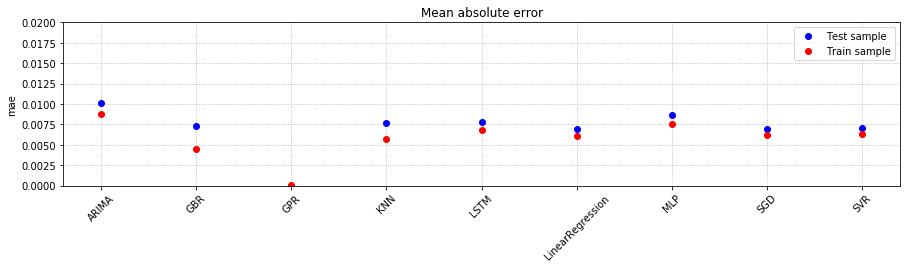

0.010222133534


In [118]:
#Fill with 0 the first entry in ARIMA prediction
train['ARIMA'].fillna(0.0, inplace=True)

xTest=[]
yTest=[]
xTrain=[]
yTrain=[]
for model in models:
    #y.append(mape(train[model].T1_PREDICT,train[model].T1_RETURN))
    y_true = test[model].T1_RETURN
    y_pred = test[model].T1_PREDICT
    print(model,mean_absolute_error(y_true, y_pred))
    yTest.append(mean_absolute_error(y_true, y_pred))
    xTest.append(model)
    y_true = train[model].T1_RETURN
    y_pred = train[model].T1_PREDICT
    print(model,mean_absolute_error(y_true, y_pred))
    yTrain.append(mean_absolute_error(y_true, y_pred))
    xTrain.append(model)

xTest,yTest = zip(*sorted(zip(xTest,yTest)))
xTrain,yTrain = zip(*sorted(zip(xTrain,yTrain)))
#print(x)
#print(y)
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(xTest,yTest, 'o',color = 'blue', label = 'Test sample')
ax.plot(xTrain,yTrain, 'o',color = 'red', label = 'Train sample')
ax.set_ylim(0,0.02)
ax.set_ylabel('mae')
ax.set_xticklabels(x,rotation=45)
ax.legend()
plt.title('Mean absolute error')
plt.grid(linestyle='dotted')
plt.show()

print(min(y))#SGD


## Root mean squared error

('KNN', 0.010864919997711806)
('KNN', 0.007588310347454391)
('ARIMA', 0.01402862208531604)
('ARIMA', 0.011938960577586163)
('MLP', 0.012281737736273498)
('MLP', 0.009900143834371456)
('LinearRegression', 0.010232611908452777)
('LinearRegression', 0.008307728517854608)
('GBR', 0.010740197971347943)
('GBR', 0.005995912187115514)
('LSTM', 0.011147131384827456)
('LSTM', 0.0091638099800824)
('SVR', 0.010320507453040919)
('SVR', 0.008495791185446706)
('SGD', 0.010222133534015618)
('SGD', 0.008400609105934927)
('GPR', 15.79966197180547)
('GPR', 0.0008405830397036435)


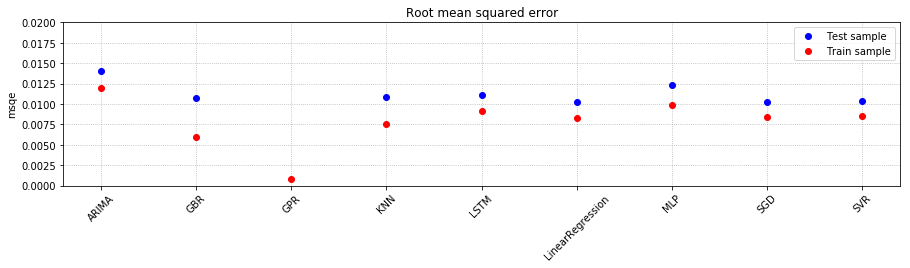

0.010222133534


In [119]:
xTest=[]
yTest=[]
xTrain=[]
yTrain=[]
for model in models:
    #y.append(mape(train[model].T1_PREDICT,train[model].T1_RETURN))
    y_true = test[model].T1_RETURN
    y_pred = test[model].T1_PREDICT
    print(model,sqrt(mean_squared_error(y_true, y_pred)))
    yTest.append(sqrt(mean_squared_error(y_true, y_pred)))
    xTest.append(model)
    y_true = train[model].T1_RETURN
    y_pred = train[model].T1_PREDICT
    print(model,sqrt(mean_squared_error(y_true, y_pred)))
    yTrain.append(sqrt(mean_squared_error(y_true, y_pred)))
    xTrain.append(model)

xTest,yTest = zip(*sorted(zip(xTest,yTest)))
xTrain,yTrain = zip(*sorted(zip(xTrain,yTrain)))
#print(x)
#print(y)
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(xTest,yTest, 'o',color = 'blue', label = 'Test sample')
ax.plot(xTrain,yTrain, 'o',color = 'red', label = 'Train sample')
ax.set_ylim(0,0.02)
ax.set_ylabel('msqe')
ax.set_xticklabels(x,rotation=45)
ax.legend()
plt.title('Root mean squared error')
plt.grid(linestyle='dotted')
plt.show()

print(min(y)) #SGD